In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('ToyotaCorolla.csv',encoding='windows-1252')


In [4]:
df.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [6]:
df.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [7]:
df['Fuel_Type'].value_counts()

Petrol    1264
Diesel     155
CNG         17
Name: Fuel_Type, dtype: int64

In [8]:
df['Model'].value_counts()

TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-Doors     107
TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors      83
TOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-Doors        79
TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-Doors       70
TOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-Doors       43
                                                       ... 
TOYOTA Corolla 2.0D 4/5-Doors                             1
TOYOTA Corolla 1.6 16v TERRA 4/5-Doors                    1
TOYOTA Corolla 1.6 HB SOL 2/3-Doors                       1
 TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors      1
TOYOTA Corolla 1.3 Linea Terra 4/5-Doors                  1
Name: Model, Length: 372, dtype: int64

In [9]:
df['Model'].value_counts().nunique()

28

In [10]:
X= df.drop(columns=['Id', 'Model', 'Price'])
y = df['Price']

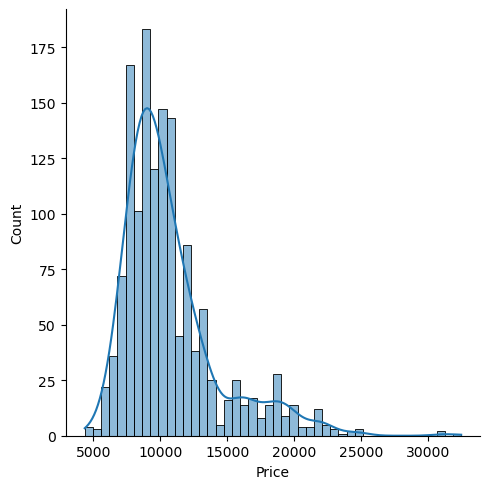

In [11]:
sns.displot(data=df, x= 'Price', kde=True)

<AxesSubplot: xlabel='Mfg_Year', ylabel='Price'>

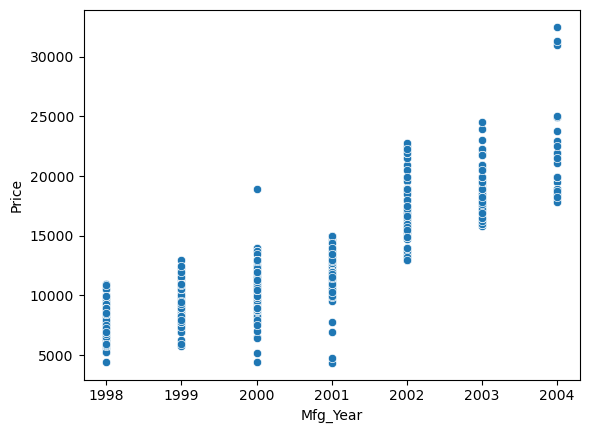

In [12]:
sns.scatterplot(data=df, x='Mfg_Year', y='Price')

<AxesSubplot: xlabel='Price', ylabel='Density'>

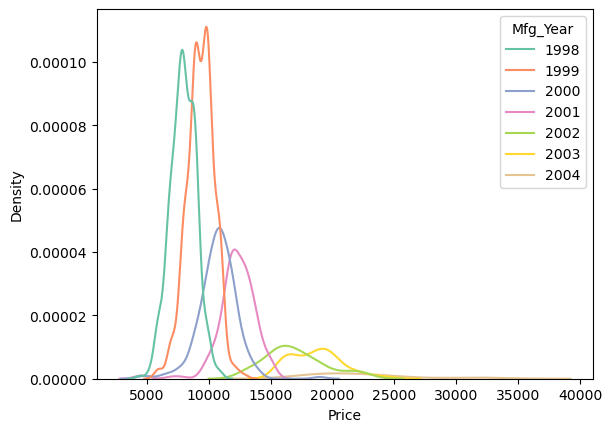

In [13]:
sns.kdeplot(data=df, x='Price', hue='Mfg_Year', palette='Set2')

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)

In [15]:
# column transformer

transformer = ColumnTransformer(transformers=[
    ('first', OneHotEncoder(), ["Fuel_Type","Color"]),
], remainder='passthrough')

In [16]:
x_train_transformed = transformer.fit_transform(x_train)
x_test_transformed = transformer.transform(x_test)

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(x_train_transformed, y_train)

LinearRegression()

In [19]:
y_pred = lr.predict(x_test_transformed)

In [20]:
r2_score(y_test,y_pred)

0.5968597297360305